### Functions and code for questions 2

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def load_data(filename):
    df = pd.read_csv(filename)
    return df

In [ ]:
# The following generates an error, hence why commented out
# df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
# This is because we need to fix up the dates

In [ ]:
def examine_dtype(df):
    print(df.dtypes)

In [ ]:
def examine_incorrect_dates(df):
    date_list = df['Date'].to_list()
    # A yyyy-mm-dd format will have length 10
    incorrect_dates = [x for x in date_list if len(x) < 10]
    print(f"Top of the list: {incorrect_dates[0:5]}")
    print('\n')
    print(f"Bottom of list: {incorrect_dates[::-1][0:5]}")

In [ ]:
def generate_correct_dates(year):
    start_date = year + "-01-01"
    end_date = year + "-12-31"
    corrected_dates = pd.date_range(start_date, end_date, freq='d')
    return corrected_dates

In [ ]:
def dataframe_invalid_dates(df):
    df_incorrect_dates = df.loc[df['Date'].str.len() != 10]
    return df_incorrect_dates

In [ ]:
def dataframe_valid_dates(df):
    df_valid_dates = df.loc[df['Date'].str.len() == 10]
    df_valid_dates.loc[:, 'Date'] = pd.to_datetime(df_valid_dates['Date'], format="%d/%m/%Y")
    return df_valid_dates

In [ ]:
def fix_bad_dates(df):
    df_invalid_dates = dataframe_invalid_dates(df)
    df_valid_dates = dataframe_valid_dates(df)
    correct_dates = generate_correct_dates('2020')
    df_invalid_dates.loc[:, 'Date'] = correct_dates
    df_merged = pd.concat([df_invalid_dates, df_valid_dates])
    df_merged.sort_values(by='Date', ascending=True, inplace=True)
    return df_merged

In [ ]:
def add_year_month_day(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    return df

In [ ]:
# Turns out this function is not really needed
def add_season_column(df):
    df['Season'] = np.nan
    df_size = df.shape[0]
    for i in range(df_size):
        if (df.loc[i, 'Month'] == 3) or (df.loc[i, 'Month'] == 4) or (df.loc[i, 'Month'] == 5):
            df.loc[i, 'Season'] = 'Spring'
        if (df.loc[i, 'Month'] == 6) or (df.loc[i, 'Month'] == 7) or (df.loc[i, 'Month'] == 8):
            df.loc[i, 'Season'] = 'Summer'
        if (df.loc[i, 'Month'] == 9) or (df.loc[i, 'Month'] == 10) or (df.loc[i, 'Month'] == 11):
            df.loc[i, 'Season'] = 'Autumn'
        if (df.loc[i, 'Month'] == 12) or (df.loc[i, 'Month'] == 1) or (df.loc[i, 'Month'] == 2):
            df.loc[i, 'Season'] = 'Winter'
    df['Season'] = df['Season'].astype('category')

In [ ]:
def set_index(df, columns):
    df2 = df.set_index(columns)
    return df2

In [ ]:
def choose_dataframe_range(df, start_year, end_year):
    """
    restricts our dataframe between the years 2016 and 2020 like the question asks
    """
    df1 = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    return df1

In [30]:
def aggregate_data(df, columns_to_group, column_to_compute, computation):
    """
    We don't really end up using the aggregate_data function, because the resample 
    function essentially does the same thing.
    """
    df_grouped = df.groupby(columns_to_group, as_index=True).agg({column_to_compute: computation})
    return df_grouped

In [ ]:
def resample_data(df, frequency, column_to_group, column_to_compute, computation):
    """
    Resampling basically groups by one or more columns, and then performs an
    aggregation on a particular column (normally) numeric. The computation can
    be min, max, sum, mean, etc.
    """
    df = df[[column_to_group, column_to_compute]]
    if computation == 'sum':
        df2 = df.resample(frequency, on=column_to_group).sum()
    if computation == 'mean':
        df2 = df.resample(frequency, on=column_to_group).mean()
    return df2

In [ ]:
def plot_resampled_data(df, y_value, titles, dashes=False):
    """
    Plots the required plots using Seaborn.
    The size of the plot is set using Matplotlib though.
    """
    fig, ax = plt.subplots(figsize=[12,5])
    if dashes == False:
        sns.lineplot(x=df.index, y=y_value, data=df, ax=ax).set(title=titles)
    else:
        sns.lineplot(x=df.index, y=y_value, data=df, linestyle='--', ax=ax).set(title=titles)
    plt.show()

In [24]:
def plot_resampled_data(df, y_value, titles, dashes=False):
    """
    Plots the required plots using Seaborn.
    The size of the plot is set using Matplotlib though.
    """
    fig, ax = plt.subplots(figsize=[12,5])
    if dashes == False:
        sns.lineplot(x=df.index, y=y_value, data=df, ax=ax).set(title=titles)
    else:
        sns.lineplot(x=df.index, y=y_value, data=df, linestyle='--', ax=ax).set(title=titles)
    plt.show()

### Implementing Question 2

In [16]:
# loading data and fixing up the dates
df = load_data('Consumption.csv')
df = fix_bad_dates(df)
add_year_month_day(df)
add_season_column(df)
df2 = set_index(df, 'Date')

/var/folders/8n/j3rsr6m972xdcq3x2dhww0rr0000gn/T/ipykernel_55105/2840280755.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid_dates.loc[:, 'Date'] = pd.to_datetime(df_valid_dates['Date'], format="%d/%m/%Y")
/var/folders/8n/j3rsr6m972xdcq3x2dhww0rr0000gn/T/ipykernel_55105/2840280755.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_valid_dates.loc[:, 'Date'] = pd.to_datetime(df_valid_dates['Date'], format="%d/%m/%Y")
/var/folders/8n/j3rsr6m972xdcq3x2dhww0rr0000gn/T/ipykernel_55105/2576275629.py:5: SettingWithCopyW

#### Plotting the different graphs

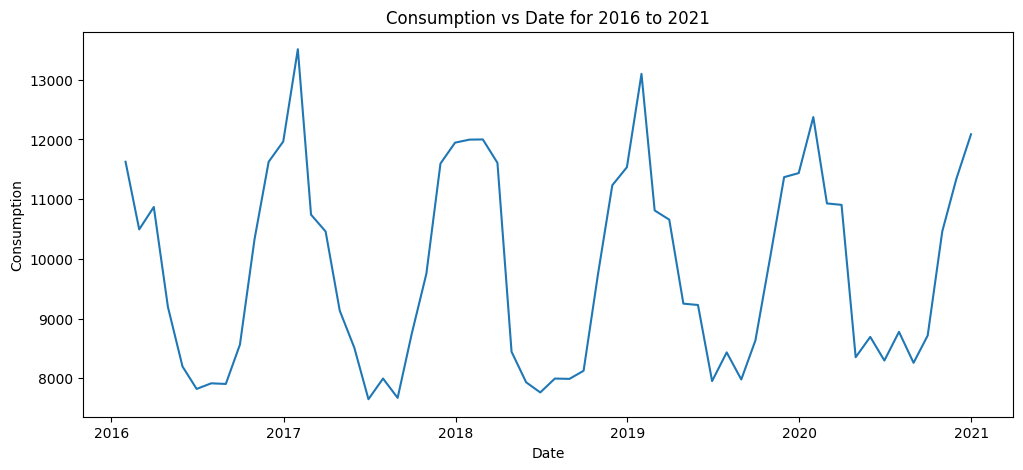

In [23]:
# plotting 5 year range
df_asked_range = choose_dataframe_range(df, 2016, 2020)
df_resampled = resample_data(df_asked_range, 'M', 'Date', 'Consumption', 'sum')
title1 = 'Consumption vs Date for 2016 to 2021'
plot_resampled_data(df_resampled, 'Consumption', title1, dashes=False)

We can see that the consumption clearly follows a seasonal pattern.

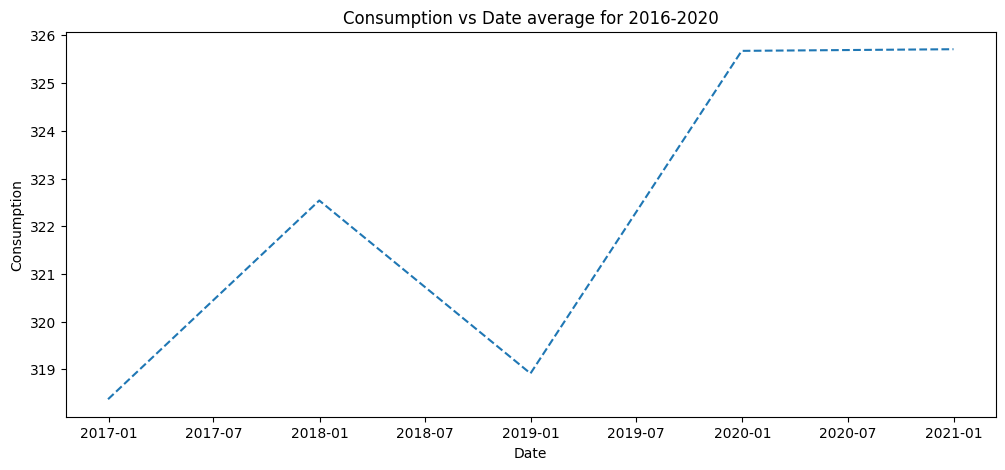

In [25]:
# plotting average line
df_average = resample_data(df_asked_range, 'Y', 'Date', 'Consumption', 'mean')
title2 = 'Consumption vs Date average for 2016-2020'
plot_resampled_data(df_average, 'Consumption', title2, dashes=True)

We can see that there is spike in consumption in 2018, which dips again in 2019, followed by larger spike in 2020.

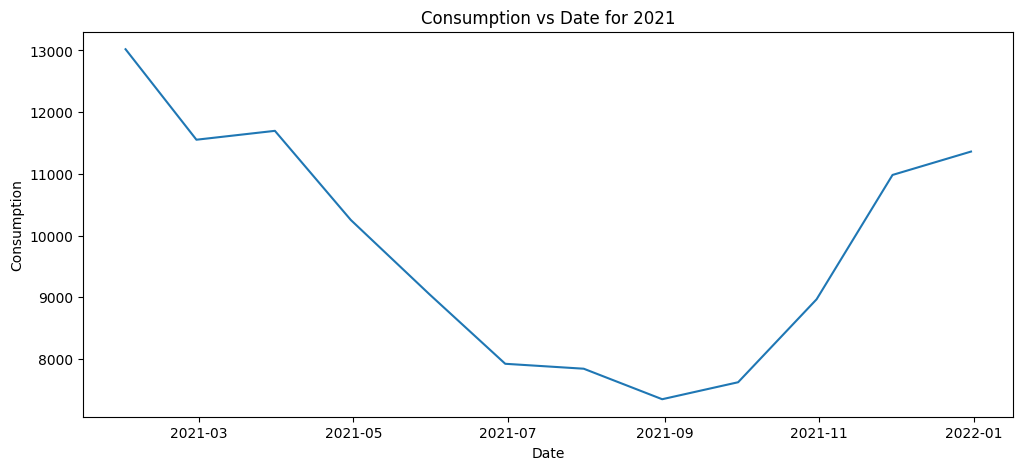

In [26]:
# plotting 2021 line
df_2021 = choose_dataframe_range(df, 2021, 2021)
df_2021 = resample_data(df_2021, 'M', 'Date', 'Consumption', 'sum')
title3: str = 'Consumption vs Date for 2021'
plot_resampled_data(df_2021, 'Consumption', title3, dashes=False)

This graph shows the consumption pattern for the year 2021. It shows a dip in consumption during the summer. The highest peak seems to be around the beginning of the year, which is suspect as normally consumption is highest prior to new year and around Christmas time!

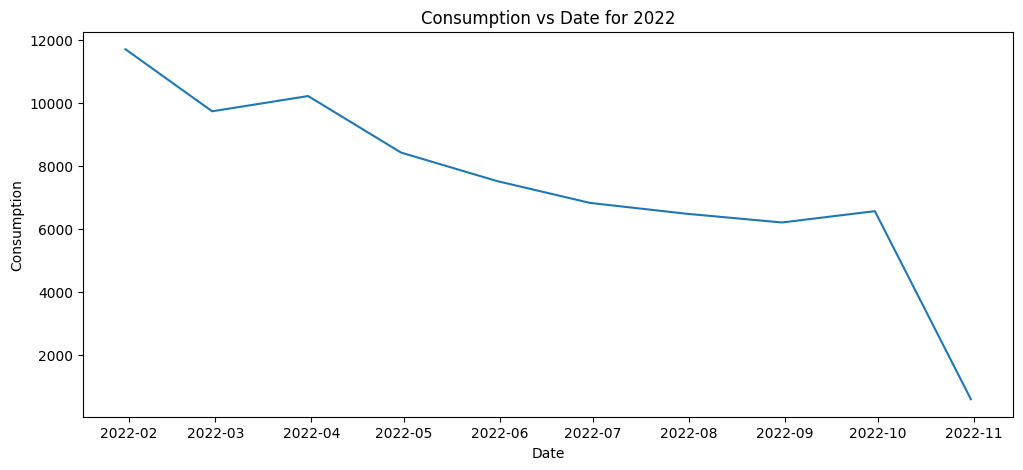

In [27]:
# plotting 2022 line
df_2022 = choose_dataframe_range(df, 2022, 2022)
df_2022 = resample_data(df_2022, 'M', 'Date', 'Consumption', 'sum')
title3: str = 'Consumption vs Date for 2022'
plot_resampled_data(df_2022, 'Consumption', title3, dashes=False)

This graph shows that consumption is at the lowest towards Christmas time, which is completely opposite to what I expected. Either I have done the analysis incorrectly, or the numbers in the csv file are just fictitious. 